In [23]:
import numpy as np
import pandas as pd
import math
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from astropy.io import ascii

In [24]:
def ArnettFit(M_N,MejE,tstart):
    # constants
    M_sun = 2e33
    c = 3e10

    #params to fit:
    #E_K=3.3737988d+51
    #M_ej 3.1629364*M_sun
    # MejE = Mej^(3/4)*Ek^(-1/4)
    

    M_Ni = M_N*M_sun
    M_ejE_K = MejE*((M_sun)**3/(1e51))**(0.25)

    # time vector (sec)
    #dt = (np.arange(103.*4)/4.+0.25)*86400.
    dt = (np.arange(tstart,303, 0.25))*86400.

    beta=13.8 # constant of integration (Arnett 1982)
    k_opt=0.05 # g cm^-2 optical opacity

    tau_Ni=8.8*86400. # decay time of Ni56 in sec
    tau_Co=9.822e6 # decay time of Co56 in sec

    e_Ni=3.90e10 # erg/s/g energy produced by 1 gram of Ni
    e_Co=6.78e9 # erg/s/g energy produced by 1 gram of Co

    # tau_m is the timescale of the light-curve
    #tau_m_test=double(((k_opt/(beta*c))^0.5)*((10.*M_ej^3./(3.*E_K))^(0.25)))
    tau_m = (((k_opt/(beta*c))**0.5)*((10./3.)**(0.25))*M_ejE_K)

    # integrate up the A(z) factor where z goes from 0 to x
    int_A= np.zeros(len(dt))
    int_B= np.zeros(len(dt))
    L_ph= np.zeros(len(dt))

    x=(dt/tau_m)
    y=(tau_m/(2.*tau_Ni))
    s=(tau_m*(tau_Co-tau_Ni)/(2.*tau_Co*tau_Ni))

    for i in range(len(dt)):
        z = np.arange(100)*x[i]/100.
        Az = 2.*z*np.exp(-2.*z*y+z**2.)
        Bz = 2.*z*np.exp(-2.*z*y+2.*z*s+z**2.)
        int_A[i] = integrate.simps(Az,z)
        int_B[i] = integrate.simps(Bz,z)
        L_ph[i] = ((M_Ni*np.exp(-1.*x[i]**2.))*((e_Ni-e_Co)*int_A[i]+e_Co*int_B[i]))

       
    return dt, L_ph#data = (np.array(mni),np.array(mekej),t,np.array(lum))
                   
                   
#print(L_ph)
#print(dt)                 

In [25]:
#0.5-8
M_sun = 2e33
M_ejE_K = 0.5  
MejE = M_ejE_K/((M_sun)**(3)/1)**(0.25)
#MejE = (M_ejE_K**(-0.25))**(-3)/M_sun
MejE

Ek = (M_ejE_K/(MejE**(3/4)))**(0.25)
print(MejE, Ek)
    #params to fit:
    #E_K=3.3737988d+51
    #M_ej 3.1629364*M_sun
    # MejE = Mej^(3/4)*Ek^(-1/4)
    
#M_ejE_K = MejE*((M_sun)**3/(1e51))**(0.25)
M_ejE_K = ((MejE*M_sun)**3/(1e51))**(0.25)

5.286856317202821e-26 46146.946389021665


In [26]:
def ValentiNebFit(MNi,Fs,tstart,fulltrap=False):
  #variables
   # Mej_sol = 5  #1-10 solar masses
   # Ek_51 =  2e51  #1e51 ergs
   # Fs = (32*Mej_sol)/math.sqrt(Ek_51)
    #MNi = 2 # mass of nickel ranges from 0.1-2
    #tstart = 150

  #constants
    M_sun = 2e33
    c = 3e10
    tau_Ni = 8.8*86400  #decay time of Ni56 in sec
    tau_Co=9.822e6   #decay time of Co56 in sec
    e_Ni=3.90e10   # erg/s/g energy produced by 1 gram of Ni
    e_Co=6.78e9   #erg/s/g energy produced by 1 gram of Co
    
    
    #Parameters
    M_Ni = MNi*M_sun
    F = Fs
    G = 16.1*F

    # time vector in days starting at tstart days post-explosion.
    dt = (np.arange(tstart,500,1))#*86400.
    
#equations;;;;;;;;;;;;;;;;;

    #Nickel source term
    S_Ni = M_Ni*e_Ni*np.exp(-(dt*86400.)/tau_Ni)

    #Cobalt Source terms:
    Epsilon = M_Ni*e_Co*(np.exp(-(dt*86400.)/tau_Co) - np.exp(-(dt*86400.)/tau_Ni))

    S_Co1 = 0.81*Epsilon*(1-np.exp(-(F/dt)**2.))
    S_Co2 = 0.164*Epsilon*(1-np.exp(-(F/dt)**2.))*(1-np.exp(-(G/dt)**2.))
    S_Co3 = 0.036*Epsilon*(1-np.exp(-(G/dt)**2.))

    #Lum = np.zeros(len(dt))
    
    if fulltrap:
        S_Co1 = 0.81*Epsilon
        S_Co2 = 0.164*Epsilon
        S_Co3 = 0.036*Epsilon
    #Total Luminosity
    Lum = S_Ni + S_Co1 + S_Co2 + S_Co3  #This should be in erg/s
    
    return dt,Lum
    
#print(Lum)
#print(dt)    

<ipython-input-22-3ca675689d99>:18: RuntimeWarning: divide by zero encountered in log10
  plt.errorbar(t,np.log10(luma),fmt = 'ko',ms =10,label = r'Bol LC:t$_{exp}$ = -3 days')
<ipython-input-22-3ca675689d99>:19: RuntimeWarning: divide by zero encountered in log10
  plt.errorbar(t,np.log10(luma),fmt='k', ms =10,linewidth = 5)
<ipython-input-22-3ca675689d99>:20: RuntimeWarning: divide by zero encountered in log10
  plt.errorbar(t100,np.log10(luma),fmt = 'co',ms =10,label = r'Bol LC:t$_{exp}$ = -100 days', linewidth = 5)
<ipython-input-22-3ca675689d99>:21: RuntimeWarning: divide by zero encountered in log10
  plt.errorbar(t100,np.log10(luma), fmt='c',ms =10, linewidth = 5)
<ipython-input-9-8803c1a26bb5>:47: RuntimeWarning: overflow encountered in double_scalars
  L_ph[i] = ((M_Ni*np.exp(-1.*x[i]**2.))*((e_Ni-e_Co)*int_A[i]+e_Co*int_B[i]))
<ipython-input-9-8803c1a26bb5>:44: RuntimeWarning: overflow encountered in multiply
  Bz = 2.*z*np.exp(-2.*z*y+2.*z*s+z**2.)
<ipython-input-9-8803c1a26

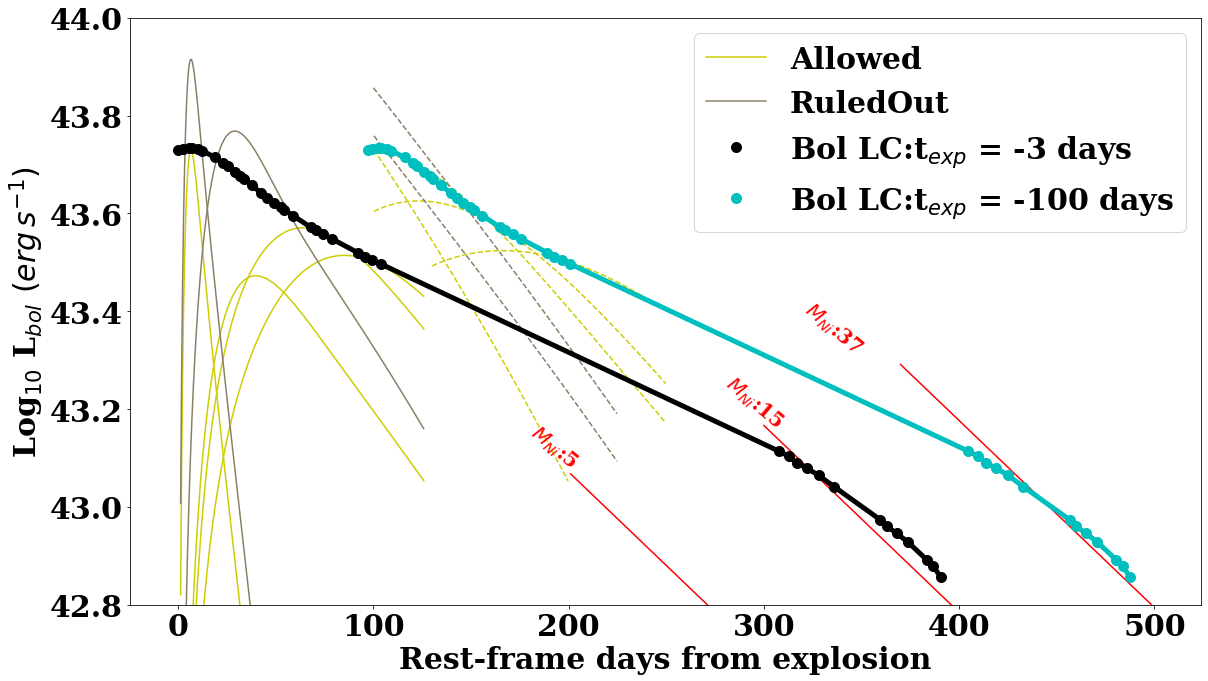

In [22]:
plt.figure(figsize=(19.20,10.80))
plt.rcParams.update({'font.size': 30})
from matplotlib import rc,rcParams
from pylab import *
from scipy import *
rc('font', weight='bold')

#plt.plot(time/86400.,np.log10(lum))#label = 'Nickel only')
file1='bol1.csv'
data1 = ascii.read(file1,format='csv')
t = data1['t']
luma = data1['lum']
lumerror =  data1['lum-error']
yerr =  lumerror
t100 = data1['t100']

#plot the bolometric LCs
plt.errorbar(t,np.log10(luma),fmt = 'ko',ms =10,label = r'Bol LC:t$_{exp}$ = -3 days')
plt.errorbar(t,np.log10(luma),fmt='k', ms =10,linewidth = 5)
plt.errorbar(t100,np.log10(luma),fmt = 'co',ms =10,label = r'Bol LC:t$_{exp}$ = -100 days', linewidth = 5)
plt.errorbar(t100,np.log10(luma), fmt='c',ms =10, linewidth = 5)

#late time fulltrap
dt_a, Lum_a  = ValentiNebFit(37,180,100,fulltrap=True)
dt_b, Lum_b  = ValentiNebFit(15,180,100,fulltrap=True)
dt_c, Lum_c  = ValentiNebFit(5,180,1,fulltrap=True)

#Call function for t0+3
time1, lum1  = ArnettFit(5.3,8,1)
time2, lum2  = ArnettFit(5,6,1)
time3, lum3  = ArnettFit(3,4,1)
time4, lum4  = ArnettFit(1.3,0.5,1)
time5, lum5  = ArnettFit(4.7,3,1)
time6, lum6  = ArnettFit(2,0.5,1)
#Call function for t0+100
time1a, lum1a  = ArnettFit(9.7,9.5,100)
time2a, lum2a  = ArnettFit(11.5,3.2,100)
time3a, lum3a  = ArnettFit(10.9,18.95,100)
time4a, lum4a  = ArnettFit(9.5,12.5,100)
time5a, lum5a  = ArnettFit(12.5,5,100)
time6a, lum6a  = ArnettFit(10,5,100)

#plot early t0+3
plt.plot((time1/86400)[1:500], (np.log10(lum1))[1:500],'#CDCD00',label ='Allowed')
plt.plot((time2/86400)[1:500], (np.log10(lum2))[1:500],'#CDCD00',)
plt.plot((time3/86400)[1:500], (np.log10(lum3))[1:500],'#CDCD00')
plt.plot((time4/86400)[1:500], (np.log10(lum4))[1:500],'#CDCD00')
plt.plot((time5/86400)[1:500], (np.log10(lum5))[1:500],'#8B7E66',label ='RuledOut')
plt.plot((time6/86400)[1:500], (np.log10(lum6))[1:500],'#8B7E66')
#plot early t0+100
plt.plot((time1a/86400)[1:600], (np.log10(lum1a))[1:600],'#CDCD00',linestyle ='--')
plt.plot((time2a/86400)[1:400], (np.log10(lum2a))[1:400],'#CDCD00',linestyle ='--')
plt.plot((time3a/86400)[120:600], (np.log10(lum3a))[120:600],'#CDCD00',linestyle ='--')
plt.plot((time4a/86400)[1:600], (np.log10(lum4a))[1:600],'#CDCD00',linestyle ='--')
plt.plot((time5a/86400)[:500], (np.log10(lum5a))[:500],'#8B7E66',linestyle ='--')
plt.plot((time6a/86400)[1:500], (np.log10(lum6a))[1:500],'#8B7E66',linestyle ='--')

#plot late t100 and t0
plt.plot(dt_a[270:],np.log10(Lum_a)[270:],'r')
plt.plot(dt_b[200:300],np.log10(Lum_b)[200:300],'r')
plt.plot(dt_c[200:498],np.log10(Lum_c)[200:498],'r')

#add the texts to specify the LC
#plt.text(340,42.95,'Mni:14',fontsize =12,ha='left', rotation=-40, wrap=True)
plt.text(280,43.25,r'$M_{Ni}$:15',color = 'r',fontsize =20,ha='left', rotation=-40, wrap=True)
#plt.text(370,42.95,'Mni:17',fontsize =12,ha='left', rotation=-40, wrap=True)

#plt.text(315,43.45,'Mni:35',fontsize =12,ha='left', rotation=-40, wrap=True)
plt.text(320,43.40,r'$M_{Ni}$:37',color = 'r', fontsize =20,ha='left', rotation=-40, wrap=True)
plt.text(180,43.15,r'$M_{Ni}$:5',color = 'r',fontsize =20,ha='left', rotation=-40, wrap=True)

plt.ylim(42.8,44)
plt.tick_params(labelsize=30)
plt.xlabel('Rest-frame days from explosion',fontsize =30, fontweight = 'bold')
plt.ylabel(r'Log$_{10}$ L$_{bol}$ $(erg\,s^{-1})$', fontsize =30, fontweight= 'bold')
plt.legend(fontsize =30)
#plt.show()
#plt.savefig('nickel_0.pdf')
#plt.savefig('NimEjLC2.png',dpi = 300, transparent = True)

In [72]:
1.0e-5/(4*np.pi)

7.957747154594768e-07

<ipython-input-28-34b7f58764e0>:18: RuntimeWarning: divide by zero encountered in log10
  plt.errorbar(t,np.log10(luma),fmt = 'ko',ms =10,label = r'Bol LC:t$_{exp}$ = -5 days')
<ipython-input-28-34b7f58764e0>:19: RuntimeWarning: divide by zero encountered in log10
  plt.errorbar(t,np.log10(luma),fmt='k', ms =10,linewidth = 5)
<ipython-input-28-34b7f58764e0>:20: RuntimeWarning: divide by zero encountered in log10
  plt.errorbar(t100,np.log10(luma),fmt = 'co',ms =10,label = r'Bol LC:t$_{exp}$ = -100 days', linewidth = 5)
<ipython-input-28-34b7f58764e0>:21: RuntimeWarning: divide by zero encountered in log10
  plt.errorbar(t100,np.log10(luma), fmt='c',ms =10, linewidth = 5)
<ipython-input-24-8803c1a26bb5>:47: RuntimeWarning: overflow encountered in double_scalars
  L_ph[i] = ((M_Ni*np.exp(-1.*x[i]**2.))*((e_Ni-e_Co)*int_A[i]+e_Co*int_B[i]))
<ipython-input-24-8803c1a26bb5>:44: RuntimeWarning: overflow encountered in multiply
  Bz = 2.*z*np.exp(-2.*z*y+2.*z*s+z**2.)
<ipython-input-24-8803c1

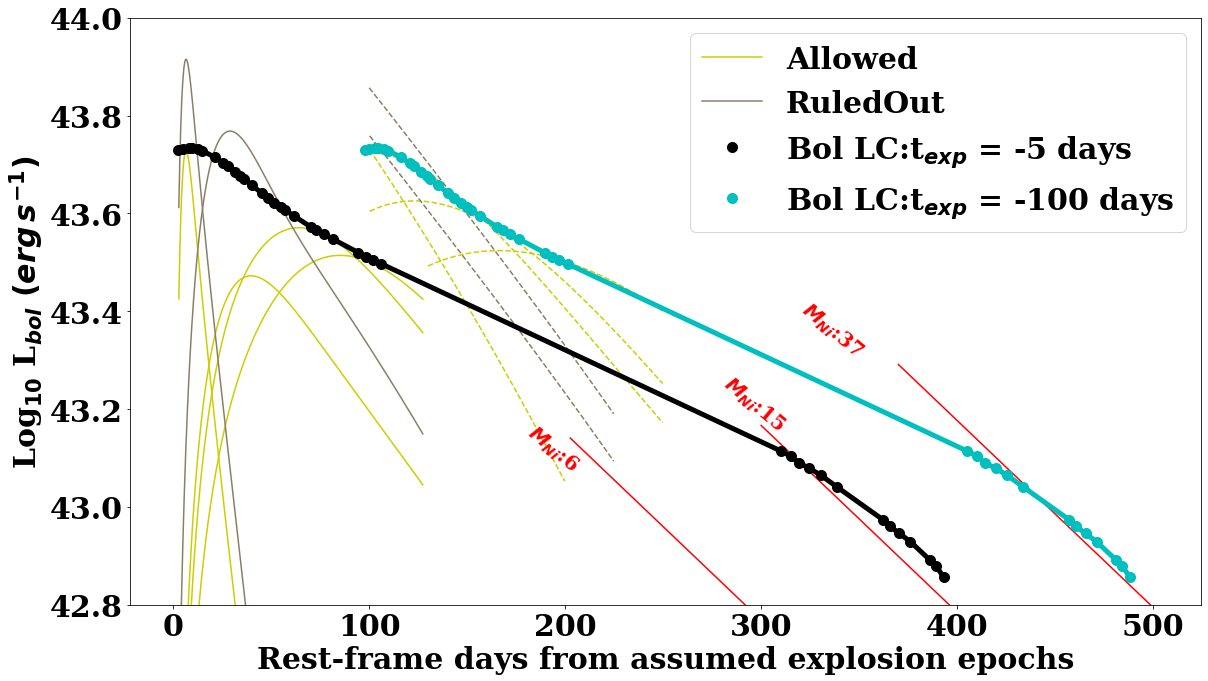

In [28]:
plt.figure(figsize=(19.20,10.80))
plt.rcParams.update({'font.size': 30})
from matplotlib import rc,rcParams
from pylab import *
from scipy import *
rc('font', weight='bold')

#plt.plot(time/86400.,np.log10(lum))#label = 'Nickel only')
file1='bol1.csv'
data1 = ascii.read(file1,format='csv')
t = data1['tgmax']+0.525965 # + 0.525965 corrects the phase to g-max = 0 time
luma = data1['lum']
lumerror =  data1['lum-error']
yerr =  lumerror
t100 = data1['t100']+0.525965 # + 0.525965 corrects the phase to g-max = 0 time

#plot the bolometric LCs
plt.errorbar(t,np.log10(luma),fmt = 'ko',ms =10,label = r'Bol LC:t$_{exp}$ = -5 days')
plt.errorbar(t,np.log10(luma),fmt='k', ms =10,linewidth = 5)
plt.errorbar(t100,np.log10(luma),fmt = 'co',ms =10,label = r'Bol LC:t$_{exp}$ = -100 days', linewidth = 5)
plt.errorbar(t100,np.log10(luma), fmt='c',ms =10, linewidth = 5)

#late time fulltrap
dt_a, Lum_a  = ValentiNebFit(37,180,100,fulltrap=True)
dt_b, Lum_b  = ValentiNebFit(15,180,100,fulltrap=True)
dt_c, Lum_c  = ValentiNebFit(6,180,2.6,fulltrap=True)

#Call function for t0+5.5
time1, lum1  = ArnettFit(5.3,8,2.6)
time2, lum2  = ArnettFit(5,6,2.6)
time3, lum3  = ArnettFit(3,4,2.6)
time4, lum4  = ArnettFit(1.3,0.5,2.6)
time5, lum5  = ArnettFit(4.7,3,2.6)
time6, lum6  = ArnettFit(2,0.5,2.6)
#Call function for t0+100
time1a, lum1a  = ArnettFit(9.7,9.5,100)
time2a, lum2a  = ArnettFit(11.5,3.2,100)
time3a, lum3a  = ArnettFit(10.9,18.95,100)
time4a, lum4a  = ArnettFit(9.5,12.5,100)
time5a, lum5a  = ArnettFit(12.5,5,100)
time6a, lum6a  = ArnettFit(10,5,100)

#plot early t0+5.5
plt.plot((time1/86400)[1:500], (np.log10(lum1))[1:500],'#CDCD00',label ='Allowed')
plt.plot((time2/86400)[1:500], (np.log10(lum2))[1:500],'#CDCD00',)
plt.plot((time3/86400)[1:500], (np.log10(lum3))[1:500],'#CDCD00')
plt.plot((time4/86400)[1:500], (np.log10(lum4))[1:500],'#CDCD00')
plt.plot((time5/86400)[1:500], (np.log10(lum5))[1:500],'#8B7E66',label ='RuledOut')
plt.plot((time6/86400)[1:500], (np.log10(lum6))[1:500],'#8B7E66')
#plot early t0+100
plt.plot((time1a/86400)[1:600], (np.log10(lum1a))[1:600],'#CDCD00',linestyle ='--')
plt.plot((time2a/86400)[1:400], (np.log10(lum2a))[1:400],'#CDCD00',linestyle ='--')
plt.plot((time3a/86400)[120:600], (np.log10(lum3a))[120:600],'#CDCD00',linestyle ='--')
plt.plot((time4a/86400)[1:600], (np.log10(lum4a))[1:600],'#CDCD00',linestyle ='--')
plt.plot((time5a/86400)[:500], (np.log10(lum5a))[:500],'#8B7E66',linestyle ='--')
plt.plot((time6a/86400)[1:500], (np.log10(lum6a))[1:500],'#8B7E66',linestyle ='--')

#plot late t100 and t0+5.5
plt.plot(dt_a[270:],np.log10(Lum_a)[270:],'r')
plt.plot(dt_b[200:300],np.log10(Lum_b)[200:300],'r')
plt.plot(dt_c[200:498],np.log10(Lum_c)[200:498],'r')

#add the texts to specify the LC
#plt.text(340,42.95,'Mni:14',fontsize =12,ha='left', rotation=-40, wrap=True)
plt.text(280,43.25,r'$M_{Ni}$:15',color = 'r',fontsize =20,ha='left', rotation=-40, wrap=True)
#plt.text(370,42.95,'Mni:17',fontsize =12,ha='left', rotation=-40, wrap=True)

#plt.text(315,43.45,'Mni:35',fontsize =12,ha='left', rotation=-40, wrap=True)
plt.text(320,43.40,r'$M_{Ni}$:37',color = 'r', fontsize =20,ha='left', rotation=-40, wrap=True)
plt.text(180,43.15,r'$M_{Ni}$:6',color = 'r',fontsize =20,ha='left', rotation=-40, wrap=True)

plt.ylim(42.8,44)
plt.tick_params(labelsize=30)
plt.xlabel('Rest-frame days from assumed explosion epochs',fontsize =30, fontweight = 'bold')
plt.ylabel(r'Log$_{10}$ L$_{bol}$ $(erg\,s^{-1})$', fontsize =30, fontweight= 'bold')
plt.legend(fontsize =30)
#plt.show()
#plt.savefig('nickel_0.pdf')
plt.savefig('NimEjLC2.png',dpi = 300, transparent = True)

In [55]:
t

-5.2714536
-3.01225918
0.0
1.5061296
4.5183888
6.777583199999999
13.555166499999999
17.697022500000003
19.9562175
23.7215415
26.357267500000003


<ipython-input-51-3b48a0e904cc>:32: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t,np.log10(luma), 'co',ms =10,markeredgecolor = 'red',label = 'PS1-11aop')
<ipython-input-51-3b48a0e904cc>:33: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t,np.log10(luma),'c',linestyle = '--', ms =10,linewidth = 4)
<ipython-input-51-3b48a0e904cc>:34: RuntimeWarning: divide by zero encountered in log10
  plt.plot(ta,np.log10(la),'#320a28',linewidth = 4, label ='SN2016aps')
<ipython-input-51-3b48a0e904cc>:35: RuntimeWarning: divide by zero encountered in log10
  plt.plot(tb,np.log10(lb),'#cb9173',linewidth = 4, label ='SN2010jl')
<ipython-input-51-3b48a0e904cc>:38: RuntimeWarning: divide by zero encountered in log10
  plt.plot(te,np.log10(le),'orange',linewidth = 4, label ='SN2006gy')
<ipython-input-51-3b48a0e904cc>:39: RuntimeWarning: divide by zero encountered in log10
  plt.plot(tf,np.log10(lf),'#b6a6ca',linewidth = 4, label ='PS1-10adi')


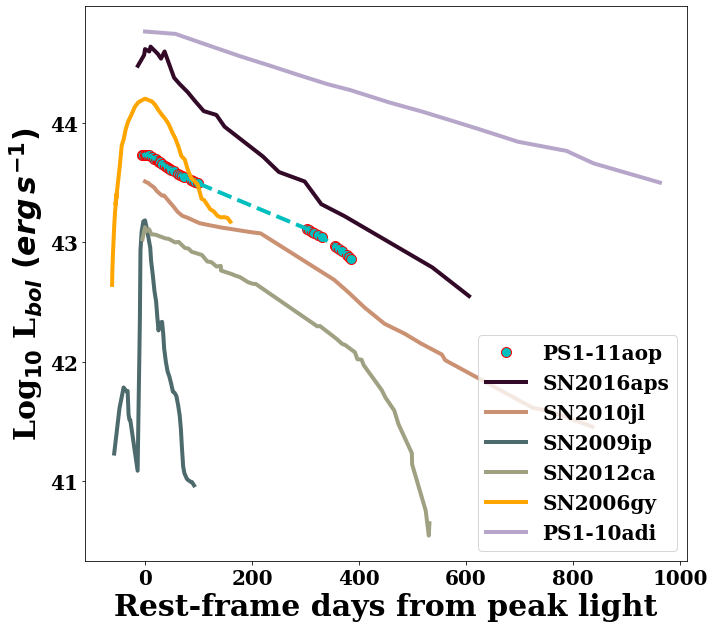

In [51]:
plt.figure(figsize=(10.80,10.20))
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 30})
from matplotlib import rc,rcParams
from pylab import *
from scipy import *
rc('font', weight='bold')

#plt.plot(time/86400.,np.log10(lum))#label = 'Nickel only')
file1='bol1.csv'
data1 = ascii.read(file1,format='csv')
t = data1['t0']-2.3793415  #-2.3793415 corrects to phase to time of peak luminosity
luma = data1['lum']
lumerror =  data1['lum-error']
yerr =  lumerror
file2 = 'otherbolsniin.csv'
data2 = ascii.read(file2,format='csv')
ta = data2['days_a']-25.11886432
la = data2['lum_a']
tb = data2['daysb']-26.87126005
lb = data2['lumb']
tc = data2['days_c']-1.939804858
lc = data2['lum_c']
td = data2['days_d']+1.059226366
ld = data2['lum_d']
te = data2['days_e']-66.88585493
le = data2['lum_e']
tf = data2['days_f']-3.897775984
lf = data2['lum_f']

#plot the bolometric LCs
plt.plot(t,np.log10(luma), 'co',ms =10,markeredgecolor = 'red',label = 'PS1-11aop')
plt.plot(t,np.log10(luma),'c',linestyle = '--', ms =10,linewidth = 4)
plt.plot(ta,np.log10(la),'#320a28',linewidth = 4, label ='SN2016aps')
plt.plot(tb,np.log10(lb),'#cb9173',linewidth = 4, label ='SN2010jl')
plt.plot(tc,np.log10(lc),'#4d6a6d',linewidth = 4, label ='SN2009ip')
plt.plot(td,np.log10(ld),'#a0a083',linewidth = 4, label ='SN2012ca')
plt.plot(te,np.log10(le),'orange',linewidth = 4, label ='SN2006gy')
plt.plot(tf,np.log10(lf),'#b6a6ca',linewidth = 4, label ='PS1-10adi')
plt.tick_params(labelsize=20)
plt.xlabel('Rest-frame days from peak light',fontsize =30,fontweight='bold')
plt.ylabel(r'Log$_{10}$ L$_{bol}$ $(erg\,s^{-1})$', fontsize =30, fontweight='bold')
plt.legend(fontsize =20)
#plt.show()

plt.savefig('bolLC.png',dpi = 300, transparent = True)

In [50]:
np.max(lc)
tc[10:20],lc[10:20]
tc[np.where(lc==1.53e+43)]

0.0


In [45]:
t[39],luma #  
#100.6543 - 3.8854711, 5.42e+43 - 3.14E+043
2.2800000000000006e+43/5.42e+43

0.4206642066420665

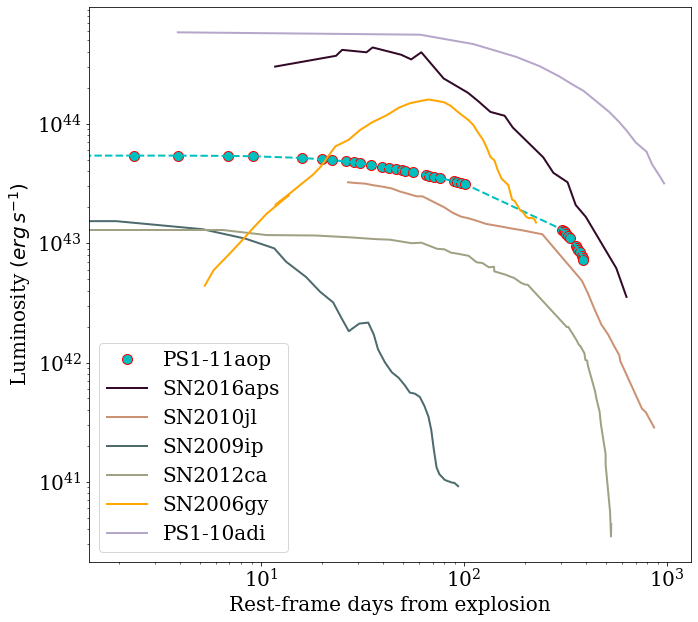

In [6]:
plt.figure(figsize=(10.80,10.20))
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 20})
#plt.plot(time/86400.,np.log10(lum))#label = 'Nickel only')
file1='bol1.csv'
data1 = ascii.read(file1,format='csv')
t = data1['t0']
luma = data1['lum']
lumerror =  data1['lum-error']
yerr =  lumerror
file2 = 'otherbolsniin.csv'
data2 = ascii.read(file2,format='csv')
ta = data2['days_a']
la = data2['lum_a']
tb = data2['daysb']
lb = data2['lumb']
tc = data2['days_c']
lc = data2['lum_c']
td = data2['days_d']
ld = data2['lum_d']
te = data2['days_e']
le = data2['lum_e']
tf = data2['days_f']
lf = data2['lum_f']

#plot the bolometric LCs
plt.loglog(t,(luma), 'co',ms =10,markeredgecolor = 'red',label = 'PS1-11aop')
plt.loglog(t,(luma),'c',linestyle = '--', ms =10,linewidth = 2)
plt.loglog(ta,(la),'#320a28',linewidth = 2, label ='SN2016aps')
plt.loglog(tb,lb,'#cb9173',linewidth = 2, label ='SN2010jl')
plt.loglog(tc,(lc),'#4d6a6d',linewidth = 2, label ='SN2009ip')
plt.loglog(td,(ld),'#a0a083',linewidth = 2, label ='SN2012ca')
plt.loglog(te,(le),'orange',linewidth = 2, label ='SN2006gy')
plt.loglog(tf,(lf),'#b6a6ca',linewidth = 2, label ='PS1-10adi')
plt.tick_params(labelsize=20)
plt.xlabel('Rest-frame days from explosion',fontsize =20)
plt.ylabel(r'Luminosity $(erg\,s^{-1})$', fontsize =20)
plt.legend(fontsize =20)
#plt.show()
#plt.savefig('nickel_0.pdf')
#plt.savefig('bolLC.png',dpi = 300, transparent = True)

<ipython-input-7-50029d66d5e1>:9: RuntimeWarning: invalid value encountered in power
  return a*np.power(x, b)
/Users/adaezeibik/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([1., 1.])

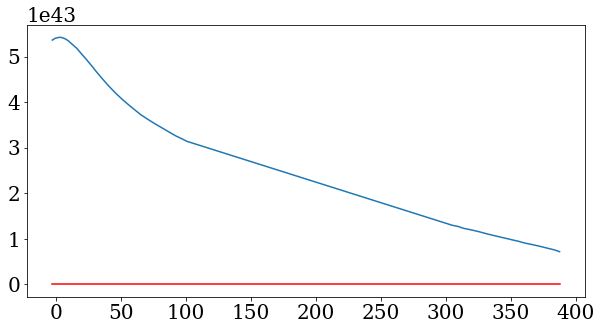

In [7]:
# Function to calculate the power-law with constants a and b
fig, ax = plt.subplots(1, 1,figsize=(10,5), sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})

from scipy.optimize import curve_fit
import matplotlib as mpl

def power_law(x, a, b):
    return a*np.power(x, b)
x = t
ya = power_law(x,1e42,2)
# import math
# y = [0 if math.isnan(ya) else ya for ya in y]
# from numpy import inf

# #y = luma
# ax.set_xscale('log')
# ax.set_yscale('log')
# # Edit the major and minor tick locations of x and y axes
# ax.xaxis.set_major_locator(mpl.ticker.LogLocator(base=10.0))
# ax.yaxis.set_major_locator(mpl.ticker.LogLocator(base=10.0))
# #Plot the fit data as an overlay on the scatter data
plt.plot(t,luma)
#x.plot(x, power_law(x,*pars),linestyle='--', linewidth=2, color='black')

# Fit the dummy power-law data
popt, pcov = curve_fit(f=power_law, xdata=x, ydata=ya)#0=[0, 0], bounds=(-1000,1000))
plt.plot(x,power_law(x, *popt), 'r-')
# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
#tdevs = np.sqrt(np.diag(cov))
# Calculate the residuals
#es = y - power_law(x, *pars)
popt
#rint(stdevs)
#rint(res)
#lt.show()

/home/ibik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


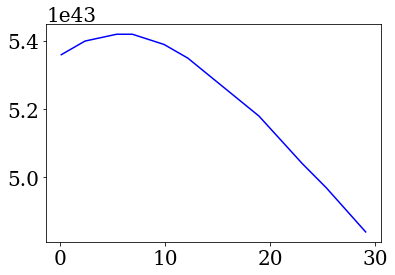

In [12]:
from statsmodels.formula.api import ols 
file1='bol1.csv'
data1 = ascii.read(file1,format='csv')
df = pd.read_csv(file1)
#t = data1['t']
#luma = data1['lum']
t = df['t'][:27]
luma = df['lum'][:27]
loglum = np.log(df[['lum']])
logtime = np.log(df[['t']])
dflog = np.log(df[['t','lum']][:27])
#model = ols('loglum ~ logtime',data = dflog).fit()
model = ols('luma ~ t',data = dflog).fit()
model.summary()

lum_hat = np.exp(5.75e+43)* df[['t']][:27]**(1)
#df.insert(loc =1, value = lum_hat, column = 'lum_hat')

plt.plot(t[:10],luma[:10], 'b')
#plt.plot(t,lum_hat,'r')
#plt.plot(np.log10(t),np.log10(luma), 'b')
#plt.plot(np.log10(t),np.log10(lum_hat),'r')


#interpolation
# from scipy import interpolate
# flum = interpolate.interp1d(t,luma)
# t_new = np.linspace(-200,100,100)

#plt.plot(t,luma,'ro')
#plt.plot(t_new,flum(t_new),'b-')
#plt.show()

In [83]:
from pylab import *
from scipy import *

# Define function for calculating a power law
powerlaw = lambda x, amp, index: amp * (x**index)

##########
# Generate data points with noise
##########
num_points = 20

# Note: all positive, non-zero data
xdata = linspace(1.1, 10.1, num_points) 
#ydata = powerlaw(xdata, 10.0, -2.0)     # simulated perfect data
#yerr = 0.2 * ydata                      # simulated errors (10%)

#ydata += randn(num_points) * yerr   

##########
# Fitting the data -- Least Squares Method
##########

# Power-law fitting is best done by first converting
# to a linear equation and then fitting to a straight line.
#
#  y = a * x^b
#  log(y) = log(a) + b*log(x)
#
xdata = data1['t0'][:10]
ydata = data1['lum'][:10]
lumerror =  data1['lum-error'][:10]
yerr =  lumerror
logx = np.log10(xdata)
logy = np.log10(ydata)
logyerr = yerr / ydata
#logyerr = 0
#from scipy.optimize import curve_fit
from scipy import optimize
# define our (line) fitting function
fitfunc = lambda p, x: p[0] + p[1] * x   
errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err

pinit = [1.0, -1.0]
out = optimize.leastsq(errfunc, pinit,
                      args=(logx, logy, logyerr), full_output=1)

pfinal = out[0]
covar = out[1]
#print(pfinal)
#print(covar)

index = pfinal[1]
amp = 10.0**pfinal[0]

indexErr = np.sqrt( covar[0][0] ) 
ampErr = np.sqrt( covar[1][1] ) * amp

print(index,amp)
   

-0.04644139254150809 5.793507188413181e+43


/home/ibik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log10


<Figure size 432x288 with 0 Axes>

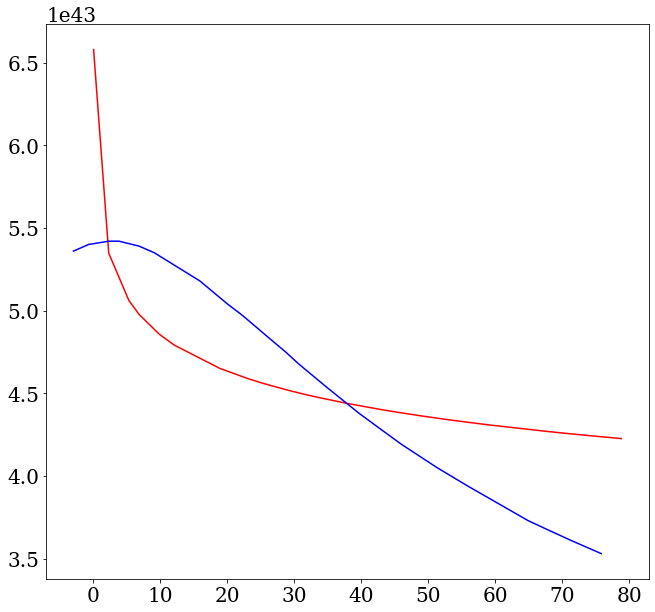

In [81]:
##########
# Plotting data
##########

plt.clf()
plt.figure(figsize=(10.80,10.20))
#plt.subplot(2, 1, 1)
#xdata_model = np.linspace(-10,10,20)
#xdata = np.arange(-100,1,20)
#plt.plot(xdata_model, powerlaw(xdata_model, amp, index),'r')
plt.plot(xdata, powerlaw(xdata, amp, index),'r')# Fit
# #plt.errorbar(xdata, ydata, fmt='k.')  # Data
#xdata = data1['t'][:3]
#plt.plot(xdata, ydata,'k')
# plt.text(5, 6.5, 'Ampli = %5.2f +/- %5.2f' % (amp, ampErr))
# plt.text(5, 5.5, 'Index = %5.2f +/- %5.2f' % (index, indexErr))
# #plt.title('Best Fit Power Law')
# plt.xlabel('X')
# plt.ylabel('Y')
# #plt.xlim(-10, 11)
t = data1['t0'][:23]
luma = data1['lum'][:23]
plt.plot(t,luma,'b')
# #interpolation
# from scipy import interpolate
# flum = interpolate.interp1d(xdata,ydata)
# t_new = np.linspace(-200,100,100)
# plt.plot(t_new,flum(t_new),'b-')
# plt.plot(t_new, powerlaw(t_new, amp, index))     # Fit
plt.show()
#plt.savefig('power_law_fit.png')

/home/ibik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


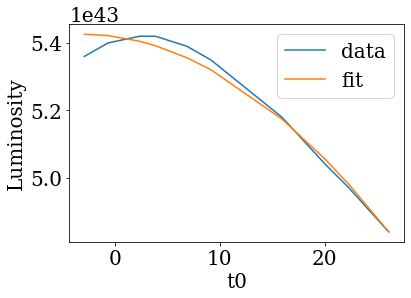

In [109]:
import pandas
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
index_fit=10 #ending index of data to use for fitting (so if index_fit=10 use datapoints 0 to 10)
df= pandas.read_csv("bol1.csv") #read in the data
df = df.dropna() #drop the nan entries

#organize data into lists
data_t = df['t0'].tolist()[:index_fit]
data_lum = df['lum'].tolist()[:index_fit]

#define a power law function
def power_law(x, offset_y,offset_x, amp, index):
    return offset_y + amp*((x+offset_x)**index)

#fit data to the powerlaw (I got the initial guesses for the paramaters from trial and error)
popt, pcov = curve_fit(power_law, data_t, data_lum, p0 = np.asarray([6E43,5,-1E40,2]))

#extrapolate to earlier times
model_t = np.linspace(-95,50, dtype=np.complex)
model_lum = power_law(model_t, *popt)

#plot the data that was used to create the fit with the power-law fit
plt.figure()
plt.ylabel('Luminosity')
plt.xlabel("t0")
plt.plot(data_t,data_lum,label='data')
plt.plot(data_t, power_law(data_t, *popt),  label='fit')
plt.legend()

/home/ibik/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


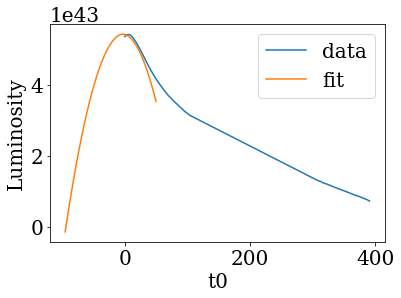

In [119]:
#Plot the data and the extrapolated model
plt.figure()
plt.ylabel('Luminosity')
plt.xlabel("t0")
t = df['t']
luma = df['lum']
#plt.plot(data_t,data_lum,label='data')
plt.plot(t,luma,label = 'data')
plt.plot(model_t,model_lum,  label='fit')
#plt.ylim(0,5e43)
#plt.xlim(-94,-50)
plt.legend()
#gives t_expl = 94 days before g-max

<ipython-input-54-061cd87fbef1>:27: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  xdata = linspace(1.1, 10.1, num_points)
<ipython-input-54-061cd87fbef1>:31: DeprecationWarning: scipy.randn is deprecated and will be removed in SciPy 2.0.0, use numpy.random.randn instead
  ydata += randn(num_points) * yerr


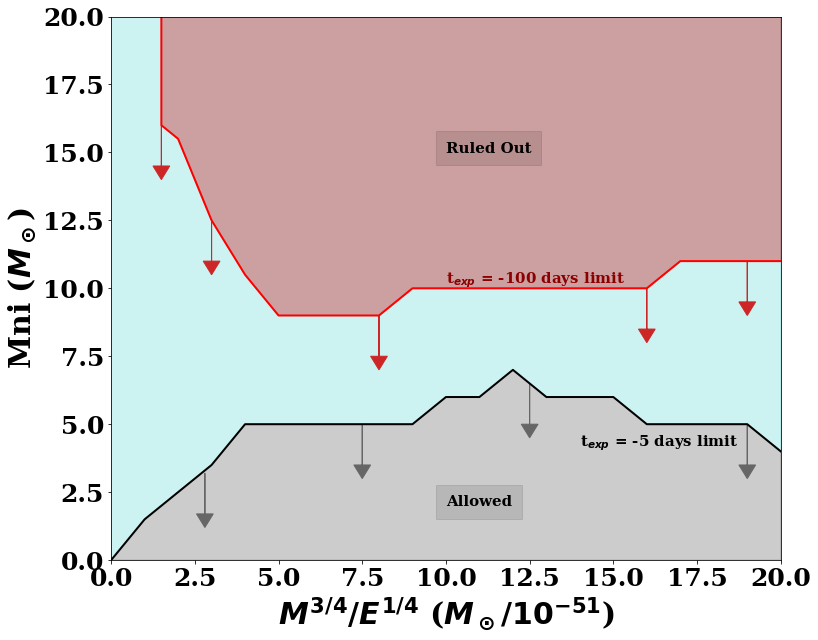

In [54]:
fig = plt.figure(figsize=(12,10))
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 30})
file_in1 = 'Nickel2a.csv'
data_plot1 = ascii.read(file_in1)

from matplotlib import rc,rcParams
rc('font', weight='bold')
from pylab import *
from scipy import *

# Define function for calculating a power law
powerlaw = lambda x, amp, index: amp * (x**index)

##########
# Generate data points with noise
##########
num_points = 20#interpolation
# from scipy import interpolate
# flum = interpolate.interp1d(xdata,ydata)
# t_new = np.linspace(-200,100,100)
# plt.plot(t_new,flum(t_new),'b-')
# plt.plot(t_new, powerlaw(t_new, amp, index))     # Fit
# plt.show()

# Note: all positive, non-zero data
xdata = linspace(1.1, 10.1, num_points) 
ydata = powerlaw(xdata, 10.0, -2.0)     # simulated perfect data
yerr = 0.2 * ydata                      # simulated errors (10%)

ydata += randn(num_points) * yerr  
mni1 = data_plot1['Mni']
mej1 = data_plot1['Mekej']

file_in2 = 'Nickel2_100.csv'
data_plot2 = ascii.read(file_in2)
mni2 = data_plot2['Mni']
mej2 = data_plot2['Mekej']
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,20,15,5,0]
y = [0,1.5,2.5,3.5,5,5,5,5,5,5,6,6,7,6,6,6,5,5,5,5,4,0,0,0,0]
a = [1.5,1.5,1.5,1.5,1.5,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,20,15,5,1.5]
b = [20,19,18,17,16,15.5,12.5,10.5,9,9,9,9,10,10,10,10,10,10,10,10,11,11,11,11,20,20,20,20]

aa = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,20,15,5,0]
bb = [0,1.5,2.5,3.5,5,5,5,5,5,5,6,6,7,6,6,6,5,5,5,5,4,20,20,20,20]
#ps11aop_x = [1e14,2.39e15,2.23e15,1e14,1e14]
#ps11aop_y = [10.**(-11.33),6.6155e-13,6.7397e-13,10.**(-11.62),10.**(-11.33)]
#subplots.fill(ps11aop_x,ps11aop_y,color='crimson',alpha=1,zorder=2)
plt.fill(x,y,color='k',alpha=0.2,zorder=2)
plt.fill(a,b,color='r',alpha=0.4,zorder=2)
plt.fill(aa,bb,color='c',alpha=0.2,zorder=2)

plt.text(14,4.2,r't$_{exp}$ = -5 days limit',color ='k', fontsize=15,fontweight='bold')
plt.text(10,10.2,r't$_{exp}$ = -100 days limit',color = 'darkred',fontsize=15,fontweight='bold')
plt.text(10,2,r'Allowed',fontsize=15,fontweight='bold',bbox={'facecolor': 'k', 'alpha': 0.1, 'pad': 10})
#plt.text(4,8,r'Not Allowed by t$_{exp}$ = -3 days but Allowed by t$_{exp}$ = -100 days',fontsize=15,fontweight='bold',bbox={'facecolor': 'k', 'alpha': 0.1, 'pad': 10})
plt.text(10,15,'Ruled Out',fontsize=15,fontweight='bold',bbox={'facecolor': 'k', 'alpha': 0.1, 'pad': 10})

plt.plot(x[:21],y[:21],'k',linewidth = 2)
plt.plot(a[:24],b[:24],'r', linewidth =2)

#arrows for texp + 3
plt.arrow(2.8, 3.2, 0, -2,color='gray', length_includes_head=True,
          head_width=0.5, head_length=0.5)
plt.arrow(7.5, 5, 0, -2,color='gray', length_includes_head=True,
          head_width=0.5, head_length=0.5)
plt.arrow(12.5, 6.5, 0, -2,color='gray', length_includes_head=True,
          head_width=0.5, head_length=0.5)
plt.arrow(19, 5, 0, -2,color='gray', length_includes_head=True,
          head_width=0.5, head_length=0.5)
#arrows for texp + 100
plt.arrow(1.5, 16, 0, -2,color='red', length_includes_head=True,
           head_width=0.5, head_length=0.5)
plt.arrow(3, 12.5, 0, -2,color='red', length_includes_head=True,
           head_width=0.5, head_length=0.5)
plt.arrow(8, 9, 0, -2,color='red', length_includes_head=True,
           head_width=0.5, head_length=0.5)
plt.arrow(16, 10, 0, -2,color='red', length_includes_head=True,
           head_width=0.5, head_length=0.5)
plt.arrow(19, 11, 0, -2,color='red', length_includes_head=True,
           head_width=0.5, head_length=0.5)


plt.xlabel(r'$M^{3/4}/E^{1/4}$ (${M}_\odot$/$10^{-51}$)',fontsize =30, fontweight='bold')
plt.ylabel(r'Mni (${M}_\odot$)',fontsize =30, fontweight ='bold')
plt.ylim(0,20)
plt.xlim(0,20)
plt.tick_params(labelsize=25)
#plt.legend(fontsize =20)
#plt.show()
plt.savefig('NimEjLC.png', dpi = 500, transparent = True)
        